In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
import pandas as pd

# Option 1: Using pd.read_excel (recommended for .xlsx files)
data = pd.read_excel('/content/Online retail.xlsx', header=None)


# Option 2: Using pd.read_csv with a specified encoding (if file is actually a csv)
# data = pd.read_csv('/content/Online retail.xlsx', header=None, encoding='latin-1') # or 'iso-8859-1', 'cp1252' etc.

data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [5]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [6]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
count,7501
unique,5176
top,cookies
freq,223


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


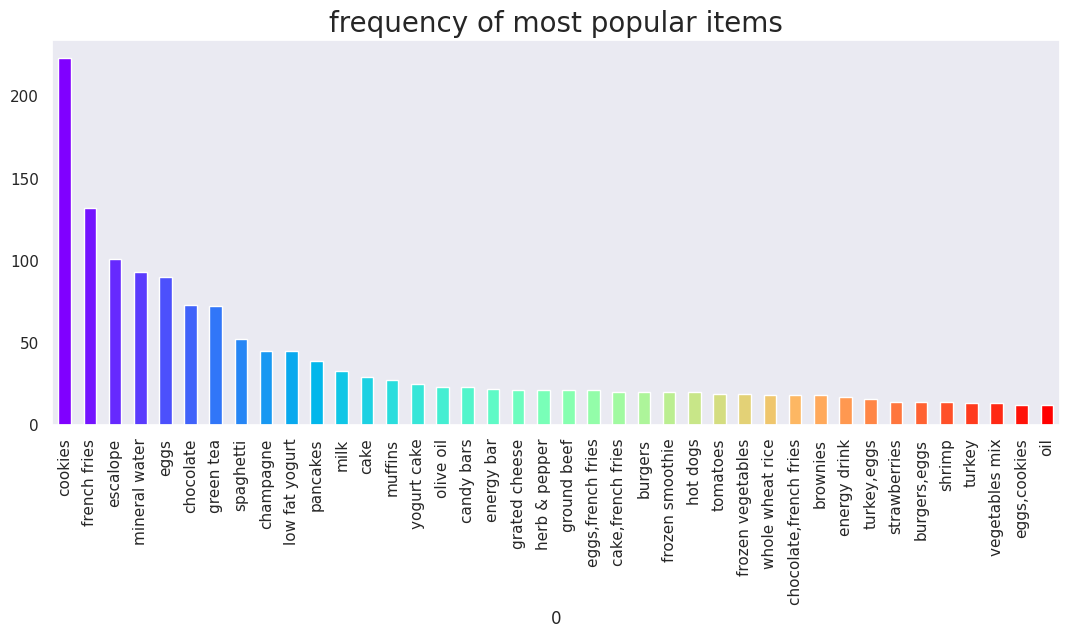

In [7]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [8]:
import networkx as nx
data['Food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'Food', target = 0, edge_attr = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


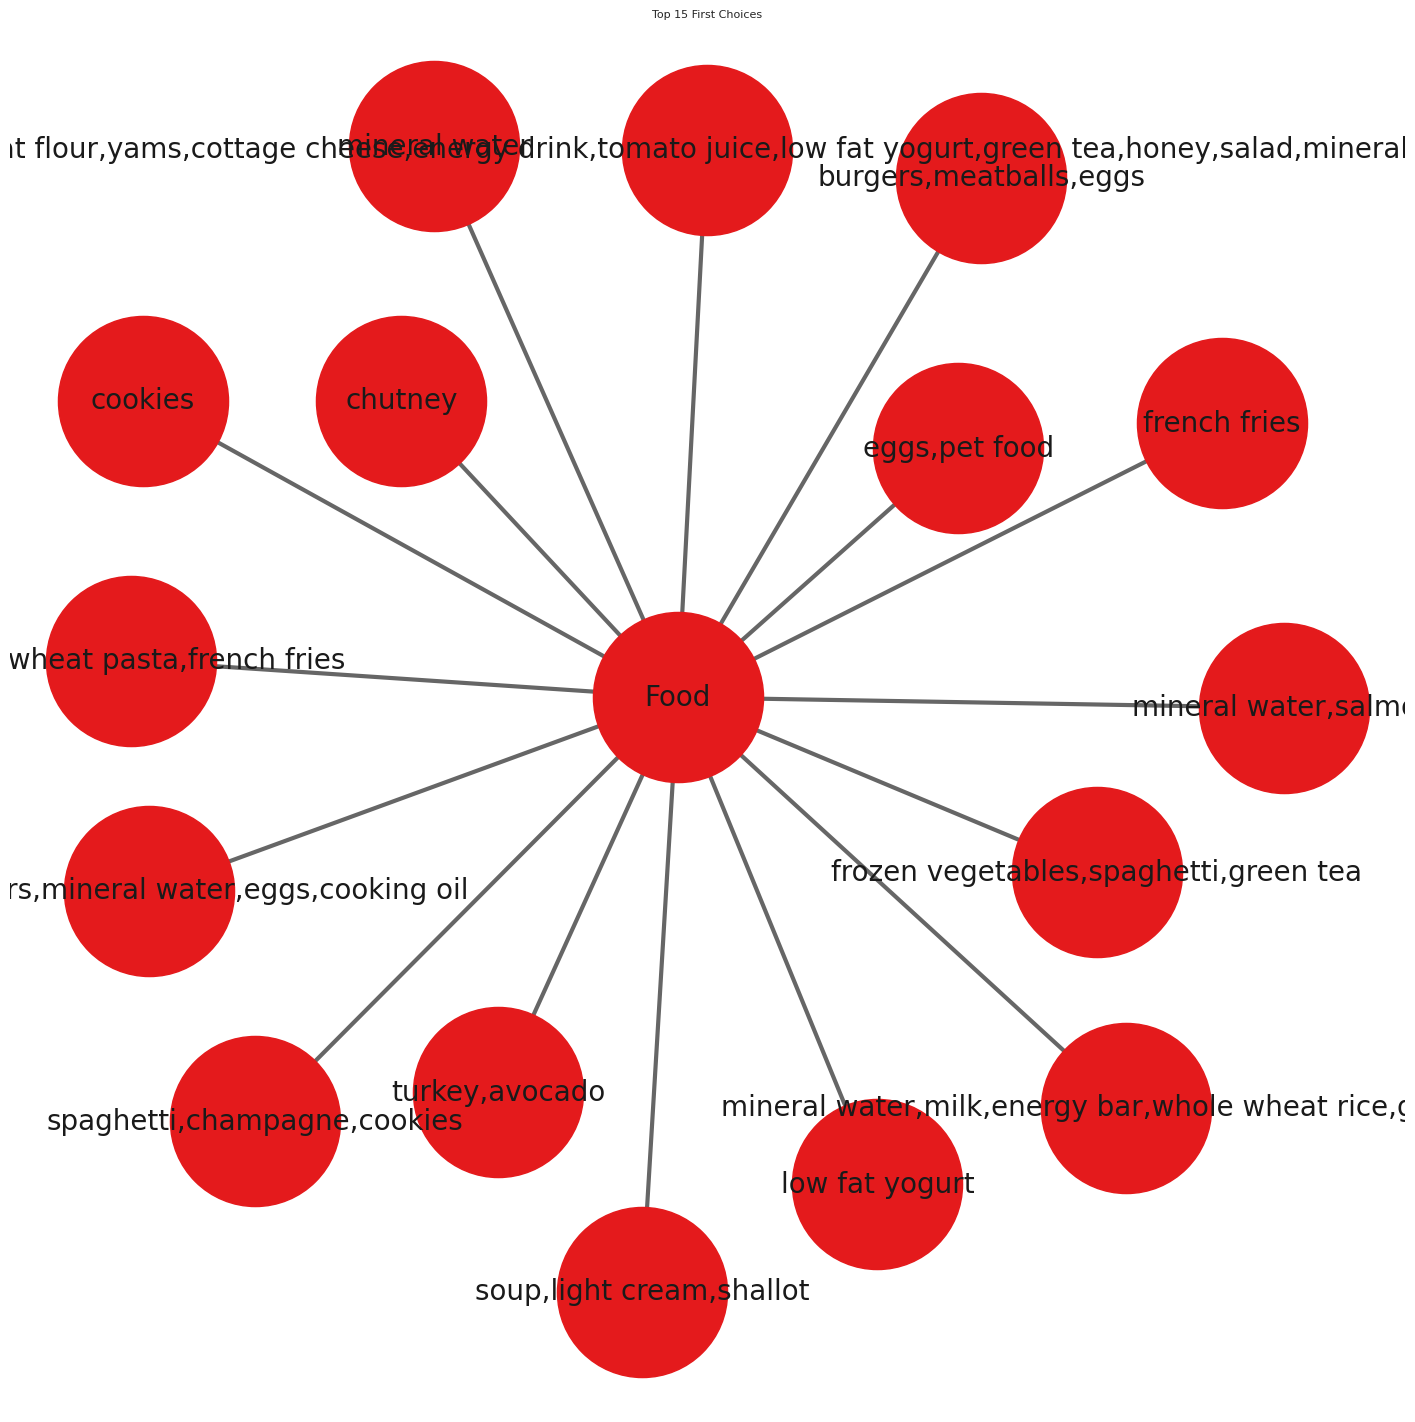

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 18)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize =8)
plt.show()

In [10]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [11]:
transactions[:1]

[['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil',
  'Food']]

In [12]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [13]:
print('# of items:',len(items))
print(list(items))

# of items: 5177
['cake,mint', 'milk,nonfat milk,muffins', 'shrimp,spaghetti,salmon,chicken', 'fresh tuna,frozen vegetables,energy bar,honey,cake,brownies,yogurt cake,energy drink', 'shrimp,frozen vegetables,green tea', 'turkey,burgers,tomatoes,spaghetti,eggs,whole weat flour,pancakes', 'honey,escalope', 'burgers,tomatoes,mineral water,eggs,french fries,strawberries,green tea', 'green grapes,hand protein bar', 'tomatoes,pepper,spaghetti,eggs,pet food,tea,chocolate,hot dogs', 'burgers,tomatoes,spaghetti,french wine,whole wheat rice,oil,tomato juice', 'cake,cookies,green tea', 'turkey,spinach,eggs', 'turkey,mineral water,eggs,green tea,hot dogs,cauliflower', 'frozen vegetables,ground beef,spaghetti,green grapes,cooking oil', 'red wine,cake,champagne', 'grated cheese,spaghetti,olive oil,eggs,whole wheat rice,cake,chicken,white wine', 'spaghetti,escalope', 'chutney,escalope', 'pancakes,eggs,french fries', 'shrimp,eggs,cake,french fries,mint,green tea', 'chocolate,shrimp,frozen vegetables,t

In [14]:
if 'nan' in items: items.remove('nan')
print(list(items))

['cake,mint', 'milk,nonfat milk,muffins', 'shrimp,spaghetti,salmon,chicken', 'fresh tuna,frozen vegetables,energy bar,honey,cake,brownies,yogurt cake,energy drink', 'shrimp,frozen vegetables,green tea', 'turkey,burgers,tomatoes,spaghetti,eggs,whole weat flour,pancakes', 'honey,escalope', 'burgers,tomatoes,mineral water,eggs,french fries,strawberries,green tea', 'green grapes,hand protein bar', 'tomatoes,pepper,spaghetti,eggs,pet food,tea,chocolate,hot dogs', 'burgers,tomatoes,spaghetti,french wine,whole wheat rice,oil,tomato juice', 'cake,cookies,green tea', 'turkey,spinach,eggs', 'turkey,mineral water,eggs,green tea,hot dogs,cauliflower', 'frozen vegetables,ground beef,spaghetti,green grapes,cooking oil', 'red wine,cake,champagne', 'grated cheese,spaghetti,olive oil,eggs,whole wheat rice,cake,chicken,white wine', 'spaghetti,escalope', 'chutney,escalope', 'pancakes,eggs,french fries', 'shrimp,eggs,cake,french fries,mint,green tea', 'chocolate,shrimp,frozen vegetables,tomatoes,mineral w

In [15]:
print(list(items))

['cake,mint', 'milk,nonfat milk,muffins', 'shrimp,spaghetti,salmon,chicken', 'fresh tuna,frozen vegetables,energy bar,honey,cake,brownies,yogurt cake,energy drink', 'shrimp,frozen vegetables,green tea', 'turkey,burgers,tomatoes,spaghetti,eggs,whole weat flour,pancakes', 'honey,escalope', 'burgers,tomatoes,mineral water,eggs,french fries,strawberries,green tea', 'green grapes,hand protein bar', 'tomatoes,pepper,spaghetti,eggs,pet food,tea,chocolate,hot dogs', 'burgers,tomatoes,spaghetti,french wine,whole wheat rice,oil,tomato juice', 'cake,cookies,green tea', 'turkey,spinach,eggs', 'turkey,mineral water,eggs,green tea,hot dogs,cauliflower', 'frozen vegetables,ground beef,spaghetti,green grapes,cooking oil', 'red wine,cake,champagne', 'grated cheese,spaghetti,olive oil,eggs,whole wheat rice,cake,chicken,white wine', 'spaghetti,escalope', 'chutney,escalope', 'pancakes,eggs,french fries', 'shrimp,eggs,cake,french fries,mint,green tea', 'chocolate,shrimp,frozen vegetables,tomatoes,mineral w

In [16]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 26796152
[('cake,mint', 'milk,nonfat milk,muffins'), ('cake,mint', 'shrimp,spaghetti,salmon,chicken'), ('cake,mint', 'fresh tuna,frozen vegetables,energy bar,honey,cake,brownies,yogurt cake,energy drink'), ('cake,mint', 'shrimp,frozen vegetables,green tea'), ('cake,mint', 'turkey,burgers,tomatoes,spaghetti,eggs,whole weat flour,pancakes')]


In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Create transaction encoder
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Print the one-hot encoded transaction dataset
print(onehot_df)

   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True
5   True   False   True  False   True


In [18]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'transactions' contains your transaction data
# Create transaction encoder
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Check if 'nan' column exists before dropping it
if 'nan' in onehot_df.columns:
    onehot_df = onehot_df.drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
print(onehot_df.head())

   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True


In [19]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,bread,butter,eggs,jam,milk
0,True,False,True,False,True
1,True,True,False,True,False
2,True,True,False,True,True
3,True,True,True,False,False
4,True,True,False,False,True


In [20]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
bread,1.000000
butter,0.666667
milk,0.666667
eggs,0.500000
jam,0.333333


In [21]:
support.describe()

,support
count,5.000000
mean,0.633333
std,0.247207
min,0.333333
25%,0.500000
50%,0.666667
75%,0.666667
max,1.000000


In [22]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['bread'], onehot['milk']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['milk'], onehot['eggs']).mean()

# Print support values
print("bread and butter: %.2f" % supportBF)
print("bread and milk: %.2f" % supportBM)
print("milk and eggs: %.2f" % supportFM)

bread and butter: 0.67
bread and milk: 0.67
milk and eggs: 0.33


In [23]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['bread+milk'] = np.logical_and(onehot['bread'], onehot['milk'])

# Compute the support
support = onehot.mean()
val = support.loc['bread+milk']

# Print the support values
print(f'bread+milk = {val}')

bread+milk = 0.6666666666666666


In [24]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['bread'], onehot['milk']).mean()

# Compute support for mineral water
supportM = onehot['bread'].mean()

# Compute support for french fries
supportF = onehot['milk'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('bread= {0:.2f},milk = {1:.2f}'.format(confidenceMM, confidenceMF))

bread= 0.67,milk = 1.00


In [25]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 1.00


In [26]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Compute support for burgers
supportB = onehot['bread'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['butter'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.00


In [27]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

In [28]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

In [29]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['milk'], onehot['eggs'])
convictionFB = conviction(onehot['bread'], onehot['butter'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['milk'], onehot['eggs'])
convictionMB = conviction(onehot['bread'], onehot['butter'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['milk'], onehot['eggs'])
convictionMF = conviction(onehot['bread'], onehot['butter'])

# Print results
print('milk ->eggs: ', convictionFB)
print('bread -> butter: ', convictionBF)

milk ->eggs:  1.0
bread -> butter:  1.0


In [38]:
# Compute the support of burgers and french fries
# Assuming 'milk' and 'eggs' are represented by columns 0 and 1 respectively
# Adjust the column indices if they are different in your 'onehot' array
supportT = onehot[:, 0].mean()  # Use column index 0 for 'milk'
supportP = onehot[:, 1].mean()  # Use column index 1 for 'eggs'

# Compute the support of both food items
# Assuming 'bread' and 'butter' are represented by columns 2 and 3 respectively
# Adjust the column indices if they are different in your 'onehot' array
supportTP = np.logical_and(onehot[:, 2], onehot[:, 3]).mean()  # Use column indices 2 and 3 for 'bread' and 'butter'

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT * supportP
denominator = max(supportTP * (1 - supportT), supportT * (supportP - supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

-1.0


In [42]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Convert transactions to one-hot encoded format
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
# The 'num_itemsets' parameter has been set to 2 here.
# Ensure to import pandas as pd earlier in the code

# Get the number of itemsets in frequent_itemsets
num_itemsets = len(frequent_itemsets)

# Pass the num_itemsets argument to the association_rules function
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=num_itemsets)


# Print association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support               itemsets
0   1.000000                (bread)
1   0.666667               (butter)
2   0.500000                 (eggs)
3   0.333333                  (jam)
4   0.666667                 (milk)
5   0.666667        (butter, bread)
6   0.500000          (bread, eggs)
7   0.333333           (bread, jam)
8   0.666667          (milk, bread)
9   0.333333          (butter, jam)
10  0.333333         (butter, milk)
11  0.333333           (milk, eggs)
12  0.333333   (butter, bread, jam)
13  0.333333  (butter, milk, bread)
14  0.333333    (milk, bread, eggs)

Association Rules:
      antecedents      consequents  antecedent support  consequent support  \
0        (butter)          (bread)            0.666667            1.000000   
1          (eggs)          (bread)            0.500000            1.000000   
2           (jam)          (bread)            0.333333            1.000000   
3          (milk)          (bread)            0.666667            1.00000

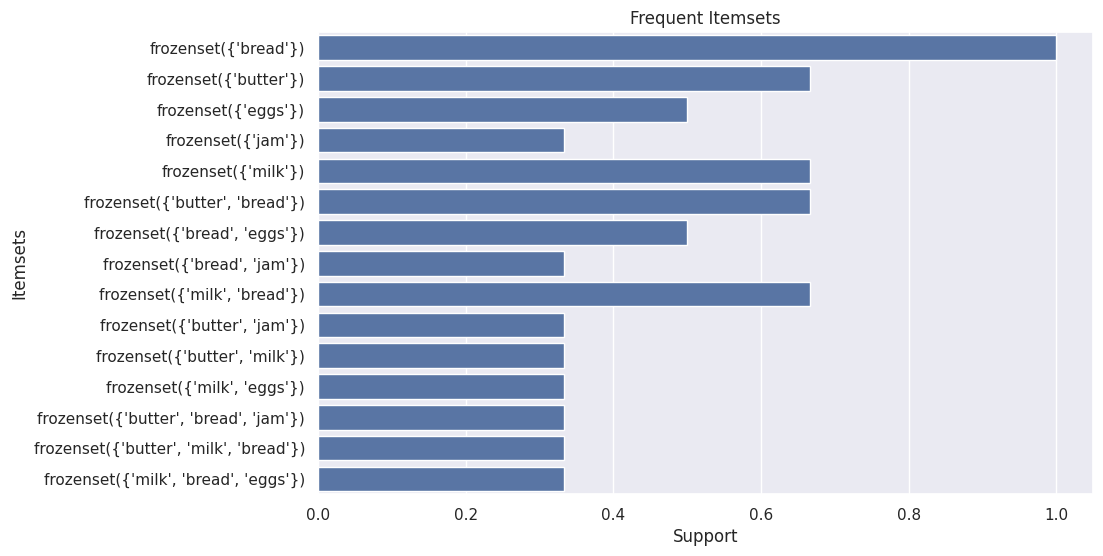

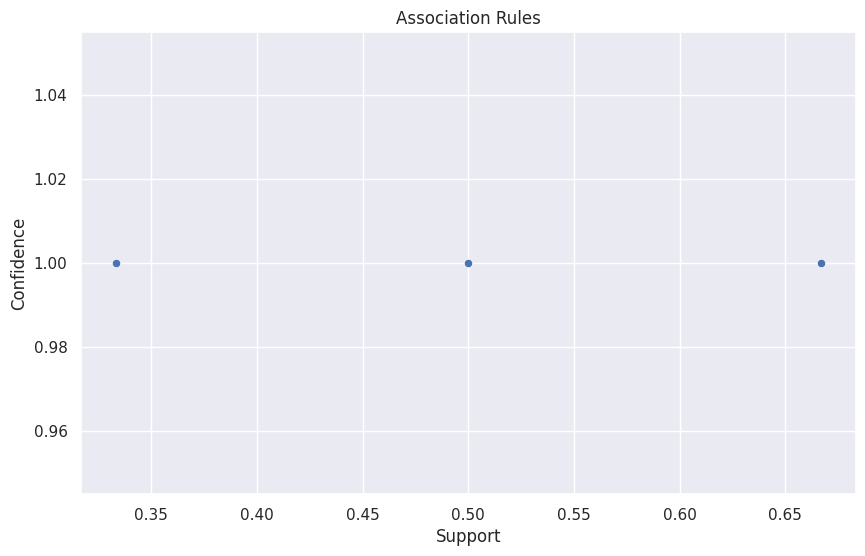

In [47]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # make sure to import necessary libraries

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Convert transactions to one-hot encoded format
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Get the number of itemsets in frequent_itemsets
num_itemsets = len(frequent_itemsets)

# Pass the num_itemsets argument to the association_rules function
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=num_itemsets)

# Plotting frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

# Plotting association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()